### Daniel Dorado - Sofía Álvarez

In [223]:
# ESAI
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from scipy.constants import Boltzmann

<h1 align='center'>Laboratorio 5: Efecto Hall</h1>

## Actividad 1: Campo magnético en función de la corriente

In [2]:
actividad_1 = pd.read_excel('Efecto_Hall.xlsx', sheet_name='B-I')

Ajustamos una regresión lineal a nuestros datos utilizando <code>scipy</code>:

In [3]:
def ajuste_lineal(x,m,b): 
    return m*x + b

In [4]:
x = np.linspace(actividad_1['Corriente (A)'][0], actividad_1['Corriente (A)'][len(actividad_1)-1], 100)
popt_act1, pcov_act1 = curve_fit(ajuste_lineal, actividad_1['Corriente (A)'], actividad_1['Campo (mT)'])

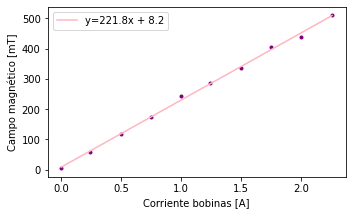

In [5]:
plt.figure(figsize=(5,5/1.61616))
plt.plot(actividad_1['Corriente (A)'], actividad_1['Campo (mT)'], '.', c='purple')
plt.plot(x, x*popt_act1[0] + popt_act1[1],c='lightpink', label='y={:.1f}x + {:.1f}'.format(popt_act1[0], popt_act1[1]))
for i in range(len(actividad_1['Corriente (A)'])):
    plt.errorbar(actividad_1['Corriente (A)'][i], actividad_1['Campo (mT)'][i],yerr=np.sqrt(pcov_act1[0,0]), c='red')
plt.xlabel('Corriente bobinas [A]')
plt.ylabel('Campo magnético [mT]')
plt.tight_layout()
plt.legend()
plt.savefig('regresion_campo.pdf')

Incertidumbre de la pendiente y del punto de corte:

In [6]:
print('Incertidumbre pendiente: ', pcov_act1[0,0])
print('Incertidumbre punto de corte: ', pcov_act1[1,1])

Incertidumbre pendiente:  11.175799118168198
Incertidumbre punto de corte:  19.923988841594426


## Actividad 2
### Voltaje de Hall en función de la corriente $I_p$ - Tarjeta P

In [7]:
p_V_I = pd.read_excel('Efecto_Hall.xlsx', sheet_name='p V-I')

In [8]:
x = np.linspace(p_V_I['Corriente (mA)'][0], p_V_I['Corriente (mA)'][len(p_V_I)-1], 100)
popt_150, pcov_150 = curve_fit(ajuste_lineal, p_V_I['Corriente (mA)'], p_V_I['Voltaje Hall a 1,5 A (mV)'])
popt_175, pcov_175 = curve_fit(ajuste_lineal, p_V_I['Corriente (mA)'], p_V_I['Voltaje Hall a 1,75 A (mV)'])
popt_200, pcov_200 = curve_fit(ajuste_lineal, p_V_I['Corriente (mA)'], p_V_I['Voltaje Hall a 2 A (mV)'])
popt_225, pcov_225 = curve_fit(ajuste_lineal, p_V_I['Corriente (mA)'], p_V_I['Voltaje Hall a 2,25 A (mV)'])
popt_250, pcov_250 = curve_fit(ajuste_lineal, p_V_I['Corriente (mA)'], p_V_I['Voltaje Hall a 2,5 A (mV)'])

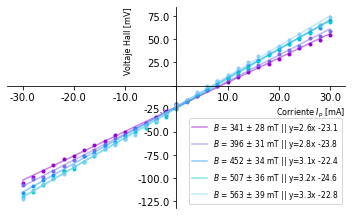

In [9]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
i_b = 1.5
B, incs = [], []
colors = ['darkviolet', 'mediumslateblue', 'dodgerblue', 'darkturquoise', 'lightskyblue', 'turquoise']
for i,col in enumerate(p_V_I.columns):
    if col != 'Corriente (mA)':
        plt.plot(p_V_I['Corriente (mA)'], p_V_I[col], '.',c=colors[i-1])
        B.append(i_b*popt_act1[0] + popt_act1[1])
        incs.append(i_b*pcov_act1[0,0] + pcov_act1[0,0])
        i_b += 0.25
plt.plot(x, x*popt_150[0] + popt_150[1],c='darkviolet', alpha=0.5, label= ('$B$ = {:.0f} $\pm$ {:.0f} mT ||' + ' y={:.1f}x {:.1f}').format(B[0], incs[0], popt_150[0], popt_150[1]))
plt.plot(x, x*popt_175[0] + popt_175[1],c='mediumslateblue', alpha=0.5, label=('$B$ = {:.0f} $\pm$ {:.0f} mT ||' +' y={:.1f}x {:.1f}').format(B[1], incs[1], popt_175[0], popt_175[1]))
plt.plot(x, x*popt_200[0] + popt_200[1],c='dodgerblue', alpha=0.5, label=('$B$ = {:.0f} $\pm$ {:.0f} mT ||' + ' y={:.1f}x {:.1f}').format(B[2], incs[2], popt_200[0], popt_200[1]))
plt.plot(x, x*popt_225[0] + popt_225[1],c='darkturquoise', alpha=0.5, label=('$B$ = {:.0f} $\pm$ {:.0f} mT ||' + ' y={:.1f}x {:.1f}').format(B[3], incs[3], popt_225[0], popt_225[1]))
plt.plot(x, x*popt_250[0] + popt_250[1],c='lightskyblue', alpha=0.5, label=('$B$ = {:.0f} $\pm$ {:.0f} mT ||' +' y={:.1f}x {:.1f}').format(B[4], incs[4], popt_250[0], popt_250[1]))

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
func = lambda x, pos: "" if np.isclose(x,0) else x
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(func))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.set_xlabel('Corriente $I_p$ [mA]', fontsize=8, loc='right')
ax.set_ylabel('Voltaje Hall [mV]', fontsize=8, loc='top')
plt.tight_layout()
ax.legend(loc='lower right',prop={'size': 7.5})
plt.savefig('p-V-I.pdf')

Ahora calculamos el coeficiente de Hall para cada corriente $I_b$ que utilizamos:

$$R_H = \frac{V_H w}{I_p B_z}$$

Note que la pendiente de todas las regresiones es $m = R_H\cdot\frac{B_z}{w}$, entonces $R_H = m \cdot\frac{w}{B_z}$.

No obstante, primero debemos calcular B_z de acuerdo con la regresión de la actividad 1, para un valor de $I_b$ determinado. Así:

In [10]:
I_b = [1.5, 1.75, 2, 2.25, 2.5] # En Amperios
B_z = [i*popt_act1[0] + popt_act1[1] for i in I_b] # En mT

In [11]:
# m en mV/mA
# w en metros
def R_H(m,B_z,w=1e-3):
    return m*w/B_z

In [12]:
# Esto queda en Ohm*m/T
R_H_150 = R_H(popt_150[0],B_z[0])
R_H_175 = R_H(popt_175[0],B_z[1])
R_H_200 = R_H(popt_200[0],B_z[2])
R_H_225 = R_H(popt_225[0],B_z[3])
R_H_250 = R_H(popt_250[0],B_z[4])
R_H_p = [R_H_150, R_H_175, R_H_200, R_H_225, R_H_250]
incertidumbres_p = [pcov_150[0,0], pcov_175[0,0], pcov_200[0,0], pcov_225[0,0], pcov_250[0,0]]

In [13]:
print('Los valores de las resistencias de Hall en Ohm*m/mT: ', R_H_p)

Los valores de las resistencias de Hall en Ohm*m/mT:  [7.751324474113994e-06, 7.15653880327402e-06, 6.8463071449524696e-06, 6.291794431972329e-06, 5.818148626115774e-06]


Queremos ver cómo se comporta la resistencia de Hall en función del campo magnético:

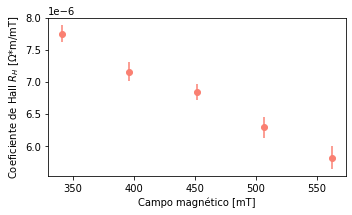

In [14]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
plt.scatter(B_z, R_H_p, color='salmon')
plt.xlabel('Campo magnético [mT]')
plt.ylabel('Coeficiente de Hall $R_H$ [$\Omega$*m/mT]')
for i in range(len(R_H_p)):
    plt.errorbar(B_z[i], R_H_p[i], yerr=np.sqrt(incertidumbres_p[i]*10**(-10)), c='salmon')
plt.tight_layout()
plt.savefig('Hall_coeff_tarjeta_p.pdf')

Note que tenemos una relación inversa entre la resistencia de Hall y el campo magnético, como es de esperarse. A medida que aumenta el campo magnético, disminuye la resistencia de Hall.

### Voltaje de Hall en función de la corriente $I_p$ - Tarjeta N

In [15]:
n_V_I = pd.read_excel('Efecto_Hall.xlsx', sheet_name='n V-I')

In [16]:
x = np.linspace(n_V_I['Corriente (mA)'][0], n_V_I['Corriente (mA)'][len(n_V_I)-1], 100)
popt_150_n, pcov_150_n = curve_fit(ajuste_lineal, n_V_I['Corriente (mA)'], n_V_I['Voltaje Hall a 1,5 A (mV)'])
popt_175_n, pcov_175_n = curve_fit(ajuste_lineal, n_V_I['Corriente (mA)'], n_V_I['Voltaje Hall a 1,75 A (mV)'])
popt_200_n, pcov_200_n = curve_fit(ajuste_lineal, n_V_I['Corriente (mA)'], n_V_I['Voltaje Hall a 2 A (mV)'])
popt_225_n, pcov_225_n = curve_fit(ajuste_lineal, n_V_I['Corriente (mA)'], n_V_I['Voltaje Hall a 2,25 A (mV)'])
popt_250_n, pcov_250_n = curve_fit(ajuste_lineal, n_V_I['Corriente (mA)'], n_V_I['Voltaje Hall a 2,5 A (mV)'])

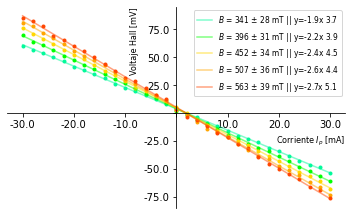

In [17]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
i_b = 1.5
colors = ['mediumspringgreen', 'lime', 'gold', 'orange', 'orangered', 'red']
for i,col in enumerate(n_V_I.columns):
    if col != 'Corriente (mA)':
        plt.plot(n_V_I['Corriente (mA)'], n_V_I[col], '.',c=colors[i-1])
        i_b += 0.25
plt.plot(x, x*popt_150_n[0] + popt_150_n[1],c=colors[0], alpha=0.5, label=('$B$ = {:.0f} $\pm$ {:.0f} mT ||' + ' y={:.1f}x {:.1f}').format(B[0], incs[0], popt_150_n[0], popt_150_n[1]))
plt.plot(x, x*popt_175_n[0] + popt_175_n[1],c=colors[1], alpha=0.5, label=('$B$ = {:.0f} $\pm$ {:.0f} mT ||' + ' y={:.1f}x {:.1f}').format(B[1], incs[1], popt_175_n[0], popt_175_n[1]))
plt.plot(x, x*popt_200_n[0] + popt_200_n[1],c=colors[2], alpha=0.5, label=('$B$ = {:.0f} $\pm$ {:.0f} mT ||' + ' y={:.1f}x {:.1f}').format(B[2], incs[2], popt_200_n[0], popt_200_n[1]))
plt.plot(x, x*popt_225_n[0] + popt_225_n[1],c=colors[3], alpha=0.5, label=('$B$ = {:.0f} $\pm$ {:.0f} mT ||' + ' y={:.1f}x {:.1f}').format(B[3], incs[3], popt_225_n[0], popt_225_n[1]))
plt.plot(x, x*popt_250_n[0] + popt_250_n[1],c=colors[4], alpha=0.5, label=('$B$ = {:.0f} $\pm$ {:.0f} mT ||' + ' y={:.1f}x {:.1f}').format(B[4], incs[4], popt_250_n[0], popt_250_n[1]))

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
func = lambda x, pos: "" if np.isclose(x,0) else x
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(func))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.set_xlabel('Corriente $I_p$ [mA]', fontsize=8, loc='right')
ax.set_ylabel('Voltaje Hall [mV]', fontsize=8, loc='top')
plt.tight_layout()
ax.legend(loc='upper right',prop={'size': 7.5})
plt.savefig('n-V-I.pdf')

In [18]:
# Esto queda en Ohm*m/mT
R_H_150_n = R_H(popt_150_n[0],B_z[0])
R_H_175_n = R_H(popt_175_n[0],B_z[1])
R_H_200_n = R_H(popt_200_n[0],B_z[2])
R_H_225_n = R_H(popt_225_n[0],B_z[3])
R_H_250_n = R_H(popt_250_n[0],B_z[4])
R_H_n = [R_H_150_n, R_H_175_n, R_H_200_n, R_H_225_n, R_H_250_n]
incertidumbres = [pcov_150_n[0,0], pcov_175_n[0,0], pcov_200_n[0,0], pcov_225_n[0,0], pcov_250_n[0,0]]

In [19]:
print('Los valores de las resistencias de Hall en Ohm*m/mT: ', R_H_p)

Los valores de las resistencias de Hall en Ohm*m/mT:  [7.751324474113994e-06, 7.15653880327402e-06, 6.8463071449524696e-06, 6.291794431972329e-06, 5.818148626115774e-06]


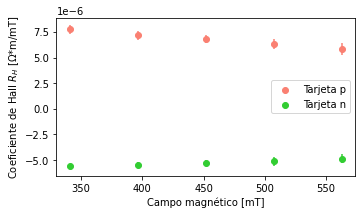

In [20]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
plt.scatter(B_z, R_H_p, color='salmon', label='Tarjeta p')
plt.scatter(B_z, R_H_n, color='limegreen', label='Tarjeta n')
plt.xlabel('Campo magnético [mT]')
plt.ylabel('Coeficiente de Hall $R_H$ [$\Omega$*m/mT]')
for i in range(len(R_H_p)):
    plt.errorbar(B_z[i], R_H_n[i], yerr=np.sqrt(incertidumbres[i]*10**(-9)), c='limegreen')
    plt.errorbar(B_z[i], R_H_p[i], yerr=np.sqrt(incertidumbres_p[i]*10**(-9)), c='salmon')
plt.tight_layout()
plt.legend()
plt.savefig('Hall_coeff_1.pdf')

### Voltaje de Hall en función del campo magnético - tarjeta P

In [21]:
p_V_B = pd.read_excel('Efecto_Hall.xlsx', sheet_name='p V-B')

In [22]:
p_V_B['Campo (mT)'] = p_V_B['Corriente (A)']*popt_act1[0] + popt_act1[1]

In [23]:
x = np.linspace(p_V_B['Campo (mT)'][0], p_V_B['Campo (mT)'][len(p_V_B)-1], 100)
popt_21, pcov_21 = curve_fit(ajuste_lineal, p_V_B['Campo (mT)'], p_V_B['Voltaje a 21 mA (mV)'])
popt_30, pcov_30 = curve_fit(ajuste_lineal, p_V_B['Campo (mT)'], p_V_B['Voltaje a 30 mA (mV)'])
popt_neg_20, pcov_neg_20 = curve_fit(ajuste_lineal, p_V_B['Campo (mT)'], p_V_B['Voltaje a -20 mA (mV)'])
popt_neg_30, pcov_neg_30 = curve_fit(ajuste_lineal, p_V_B['Campo (mT)'], p_V_B['Voltaje a -30 mA (mV)'])

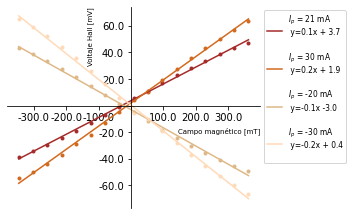

In [24]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
i_b = 1.5
colors = ['brown', 'chocolate', 'burlywood', 'peachpuff']
for i,col in enumerate(p_V_B.columns):
    if col != 'Corriente (A)' and col != 'Campo (mT)':
        plt.plot(p_V_B['Campo (mT)'], p_V_B[col], '.',c=colors[i-1])
        i_b += 0.25
plt.plot(x, x*popt_21[0] + popt_21[1],c=colors[0], label= '$I_p$ = 21 mA \n' + ' y={:.1f}x + {:.1f}\n'.format(popt_21[0], popt_21[1]))
plt.plot(x, x*popt_30[0] + popt_30[1],c=colors[1], label='$I_p$ = 30 mA \n' +' y={:.1f}x + {:.1f}\n'.format(popt_30[0], popt_30[1]))
plt.plot(x, x*popt_neg_20[0] + popt_neg_20[1],c=colors[2], label='$I_p$ = -20 mA \n' + ' y={:.1f}x {:.1f}\n'.format(popt_neg_20[0], popt_neg_20[1]))
plt.plot(x, x*popt_neg_30[0] + popt_neg_30[1],c=colors[3], label='$I_p$ = -30 mA \n' + ' y={:.1f}x + {:.1f}\n'.format(popt_neg_30[0], popt_neg_30[1]))

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
func = lambda x, pos: "" if np.isclose(x,0) else x
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(func))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.set_xlabel('Campo magnético [mT]', fontsize=7, loc='right')
ax.set_ylabel('Voltaje Hall [mV]', fontsize=7, loc='top')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 7.5})
plt.tight_layout()
fig.savefig('p-V-B.pdf')

En este caso, tenemos que calculamos el coeficiente de Hall como: $m = R_H \cdot \frac{I_p}{w}$. Entonces $R_H = m \frac{w}{I_p}$,

In [25]:
def R_H_2(m,I_p,w=1e-3):
    return m*w/I_p

In [26]:
# Esto queda en Ohm*m/mT
w = 1*10**(-3)
I_p = [21, 30, -20, -30]
R_H_21 = popt_21[0]*w/I_p[0]
R_H_30 = popt_30[0]*w/I_p[1]
R_H_neg_20 = popt_neg_20[0]*w/I_p[2]
R_H_neg_30 = popt_neg_30[0]*w/I_p[3]
R_H_p_B = [R_H_21, R_H_30, R_H_neg_30, R_H_neg_20]
#incertidumbres = [pcov_150[0,0], pcov_175[0,0], pcov_200[0,0], pcov_225[0,0]]


In [27]:
print('Los valores de las resistencias de Hall en Ohm*m/mT: ', R_H_p_B)

Los valores de las resistencias de Hall en Ohm*m/mT:  [6.016246510614599e-06, 5.812187765154268e-06, 6.46275494025042e-06, 6.837862541213102e-06]


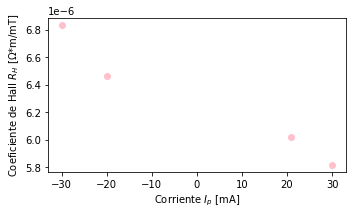

In [28]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
plt.scatter(I_p, R_H_p_B, color='pink',label='Tarjeta P')
plt.xlabel('Corriente $I_p$ [mA]')
plt.ylabel('Coeficiente de Hall $R_H$ [$\Omega$*m/mT]')
plt.tight_layout()
plt.savefig('Hall_coeff_tarjeta_p_2.pdf')

In [29]:
n_V_B = pd.read_excel('Efecto_Hall.xlsx', sheet_name='n V-B')

In [30]:
n_V_B['Campo (mT)'] = n_V_B['Corriente (A)']*popt_act1[0] + popt_act1[1]

In [31]:
x = np.linspace(n_V_B['Campo (mT)'][0], n_V_B['Campo (mT)'][len(n_V_B)-1], 100)
popt_20_n, pcov_20_n = curve_fit(ajuste_lineal, n_V_B['Campo (mT)'], n_V_B['Voltaje a 20 mA (mV)'])
popt_30_n, pcov_30_n = curve_fit(ajuste_lineal, n_V_B['Campo (mT)'], n_V_B['Voltaje a 30 mA (mV)'])
popt_neg_20_n, pcov_neg_20_n = curve_fit(ajuste_lineal, n_V_B['Campo (mT)'], n_V_B['Voltaje a -20 mA (mV)'])
popt_neg_30_n, pcov_neg_30_n = curve_fit(ajuste_lineal, n_V_B['Campo (mT)'], n_V_B['Voltaje a -30 mA (mV)'])

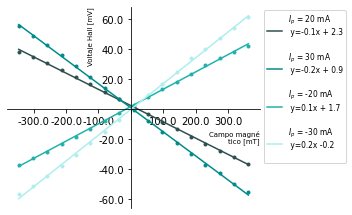

In [32]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
i_b = 1.5
colors = ['darkslategray', 'darkcyan', 'lightseagreen', 'paleturquoise']
for i,col in enumerate(n_V_B.columns):
    if col != 'Corriente (A)' and col != 'Campo (mT)':
        plt.plot(n_V_B['Campo (mT)'], n_V_B[col], '.',c=colors[i-1])
        i_b += 0.25
plt.plot(x, x*popt_20_n[0] + popt_20_n[1],c=colors[0], label= '$I_p$ = 20 mA \n' + ' y={:.1f}x + {:.1f}\n'.format(popt_20_n[0], popt_20_n[1]))
plt.plot(x, x*popt_30_n[0] + popt_30_n[1],c=colors[1], label='$I_p$ = 30 mA \n' +' y={:.1f}x + {:.1f}\n'.format(popt_30_n[0], popt_30_n[1]))
plt.plot(x, x*popt_neg_20_n[0] + popt_neg_20_n[1],c=colors[2], label='$I_p$ = -20 mA \n' + ' y={:.1f}x + {:.1f}\n'.format(popt_neg_20_n[0], popt_neg_20_n[1]))
plt.plot(x, x*popt_neg_30_n[0] + popt_neg_30_n[1],c=colors[3], label='$I_p$ = -30 mA \n' + ' y={:.1f}x {:.1f}\n'.format(popt_neg_30_n[0], popt_neg_30_n[1]))

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
func = lambda x, pos: "" if np.isclose(x,0) else x
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(func))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(func))
ax.set_xlabel('Campo magné\ntico [mT]', fontsize=7, loc='right')
ax.set_ylabel('Voltaje Hall [mV]', fontsize=7, loc='top')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 7.5})
plt.tight_layout()
fig.savefig('n-V-B.pdf')

In [33]:
# Esto queda en Ohm*m/mT
I_p = [20, 30, -20, -30]
R_H_20_n = R_H_2(popt_20_n[0],I_p[0])
R_H_30_n = R_H_2(popt_30_n[0],I_p[1])
R_H_neg_20_n = R_H_2(popt_neg_20_n[0],I_p[2])
R_H_neg_30_n = R_H_2(popt_neg_30_n[0],I_p[3])
R_H_n_B = [R_H_20_n, R_H_30_n, R_H_neg_30_n, R_H_neg_20_n]
#incertidumbres = [pcov_150[0,0], pcov_175[0,0], pcov_200[0,0], pcov_225[0,0]]

In [34]:
print('Los valores de las resistencias de Hall en Ohm*m/mT: ', R_H_n_B)

Los valores de las resistencias de Hall en Ohm*m/mT:  [-5.41995027998245e-06, -5.346365459250106e-06, -5.734642810409225e-06, -5.7686262878314106e-06]


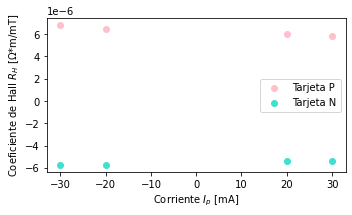

In [35]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
plt.scatter(I_p, R_H_p_B, color='pink',label='Tarjeta P')
plt.scatter(I_p, R_H_n_B, color='turquoise',label='Tarjeta N')
plt.xlabel('Corriente $I_p$ [mA]')
plt.ylabel('Coeficiente de Hall $R_H$ [$\Omega$*m/mT]')
plt.legend()
plt.tight_layout()
plt.savefig('Hall_coeff_2.pdf')

## Actividad 3

In [36]:
act_3 = pd.read_excel('Efecto_Hall.xlsx', sheet_name='Datos Nicolas')

Usando ley de Ohm: $V = IR$, entonces la pendiente será la resistencia, R_0, a temperatura ambiente.

In [37]:
I = np.linspace(act_3['Corriente (mA)'][0], act_3['Corriente (mA)'][len(act_3)-1], 100)
popt_act3_p, pcov_act3_p = curve_fit(ajuste_lineal, act_3['Corriente (mA)']/(10**3), act_3['Voltaje p (V)'])
popt_act3_n, pcov_act3_n = curve_fit(ajuste_lineal, act_3['Corriente (mA)']/(10**3), act_3['Voltaje n (V)'])

In [38]:
print('La resistencia R_0 para p: {} ± {} Ω.'.format(np.round(popt_act3_p[0],3), np.round(pcov_act3_p[0,0],3)))
print('La resistencia R_0 para n: {} ± {} Ω.'.format(np.round(popt_act3_n[0],3), np.round(pcov_act3_n[0,0],3)))

La resistencia R_0 para p: 35.503 ± 0.0 Ω.
La resistencia R_0 para n: 37.303 ± 0.0 Ω.


In [39]:
R_p, inc_R_p = np.round(popt_act3_p[0],3), np.round(pcov_act3_p[0,0],3)
R_n, inc_R_n = np.round(popt_act3_n[0],3), np.round(pcov_act3_n[0,0],3)

Ahora la conductividad: $j = \sigma E$, donde $j=I/A$, A siendo el área y $E=V/\ell$, siendo $\ell$ la longitud. Entonces,
$$V = \frac{\ell}{\sigma A} I.$$
Note que $m = l/\sigma A$, entonces $\sigma = \ell/mA$, donde $m$ es la pendiente.

In [40]:
l = 0.02
a = 0.1/1e4 #Divido entre 10^4 para que me quede en m^2. 

In [41]:
sigma_p = l/(popt_act3_p[0]*a)
sigma_n = l/(popt_act3_n[0]*a)

In [42]:
print('La conductividad para p: {} ± {} (Ω*m)^-1.'.format(np.round(sigma_p,3), np.round(pcov_act3_p[0,0],3)))
print('La conductividad para n: {} ± {} (Ω*m)^-1.'.format(np.round(sigma_n,3), np.round(pcov_act3_n[0,0],3)))

La conductividad para p: 56.333 ± 0.0 (Ω*m)^-1.
La conductividad para n: 53.615 ± 0.0 (Ω*m)^-1.


In [43]:
v_long_p = pd.read_excel('Efecto_Hall.xlsx', sheet_name='Voltaje longitudinal p')
v_long_n = pd.read_excel('Efecto_Hall.xlsx', sheet_name='Voltaje longitudinal n')

In [189]:
v_long_p

,Corriente,B = 25 (mT),B = 50 (mT),B = 75 (mT),B = 100 (mT),B = 125 (mT),B = 150 (mT),B = 175 (mT),B = 225 (mT),B = 250 (mT),B = 275 (mT)
0,-30,-1.065309,-1.066038,-1.067234,-1.068907,-1.070125,-1.072067,-1.073914,-1.075271,-1.078808,-1.082876
1,-27,-0.959080,-0.959094,-0.960264,-0.962302,-0.963000,-0.964893,-0.966572,-0.967871,-0.970886,-0.974515
2,-24,-0.852310,-0.852570,-0.853465,-0.855117,-0.856350,-0.857688,-0.859007,-0.860594,-0.863117,-0.866521
3,-21,-0.745872,-0.745979,-0.747082,-0.748368,-0.749400,-0.750256,-0.751684,-0.752781,-0.755370,-0.758288
4,-18,-0.639323,-0.639740,-0.640114,-0.641337,-0.642228,-0.643210,-0.644442,-0.645323,-0.647133,-0.649827
5,-15,-0.532887,-0.533176,-0.533622,-0.534585,-0.535315,-0.536028,-0.536912,-0.537868,-0.539519,-0.541411
6,-12,-0.426121,-0.426472,-0.426777,-0.427612,-0.428128,-0.428623,-0.429470,-0.430210,-0.431618,-0.433237
7,-9,-0.319607,-0.319792,-0.320129,-0.320794,-0.321047,-0.321612,-0.322048,-0.322565,-0.323706,-0.324912
8,-6,-0.213102,-0.213258,-0.213432,-0.213761,-0.214048,-0.214346,-0.214810,-0.215119,-0.215699,-0.216599
9,-3,-0.106553,-0.106622,-0.106688,-0.106892,-0.107054,-0.107204,-0.107390,-0.107569,-0.107880,-0.108308


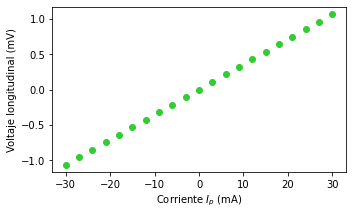

In [198]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
plt.scatter(v_long_p['Corriente'], v_long_p['B = 25 (mT)'], c='limegreen' )
plt.ylabel('Voltaje longitudinal (mV)')
plt.xlabel('Corriente $I_p$ (mA)')
plt.tight_layout()
plt.savefig('lineales_a_25mT.pdf')

In [57]:
R_m_p = []
R_m_n = []
incs_R_m_p = []
incs_R_m_n = []
for col in v_long_p.columns:
    if col != 'Corriente':
        popt, pcov = curve_fit(ajuste_lineal, v_long_p['Corriente']/(10**3), v_long_p[col])
        R_m_p.append(popt[0])
        incs_R_m_p.append(pcov[0,0])
        popt, pcov = curve_fit(ajuste_lineal, v_long_n['Corriente']/(10**3), v_long_n[col])
        R_m_n.append(popt[0])
        incs_R_m_n.append(pcov[0,0])
R_m_p = np.array(R_m_p)
R_m_n = np.array(R_m_n)

diff_p = (R_m_p - R_p)/R_p
diff_n = (R_m_p - R_n)/R_n

In [94]:
B = np.array([i for i in range(25,300,25) if i != 200])

In [295]:
def ajuste_cubico(x,a,b,c):
    return a*x**2 + b*x + c

In [296]:
popt_p, pcov_p = curve_fit(ajuste_cubico, B, diff_p)
popt_n, pcov_n = curve_fit(ajuste_cubico, B, diff_n)

In [297]:
y_ajust_p = popt_p[0]*B**2 + popt_p[1]*B + popt_p[2]
y_ajust_n = popt_n[0]*B**2 + popt_n[1]*B + popt_n[2]

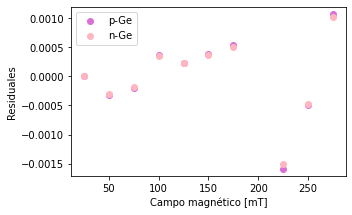

In [298]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
plt.scatter(B, diff_p - y_ajust_p, label='p-Ge', color='orchid')
plt.scatter(B, diff_n - y_ajust_n, label='n-Ge', color='lightpink')
plt.xlabel('Campo magnético [mT]')
plt.ylabel(r'Residuales')
plt.legend()
plt.tight_layout()
plt.savefig('residuales.pdf')

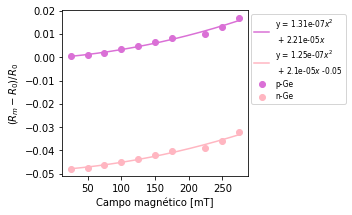

In [308]:
x = np.linspace(B[0], B[-1],1000)
fig, ax = plt.subplots(figsize=(5,5/1.61616))
plt.scatter(B, diff_p, label='p-Ge', color='orchid')
plt.plot(x, popt_p[0]*x**2 + popt_p[1]*x + popt_p[2], label='y = {}$x^2$\n + {}$x$'.format(np.round(popt_p[0],9), np.round(popt_p[1],7)), color='orchid')
plt.scatter(B, diff_n, label='n-Ge', color='lightpink')
plt.plot(x, popt_n[0]*x**2 + popt_n[1]*x + popt_n[2], label='y = {}$x^2$\n + {}$x$ {}'.format(np.round(popt_n[0],9), np.round(popt_n[1],7), np.round(popt_n[2],2)), color='lightpink')
plt.xlabel('Campo magnético [mT]')
plt.ylabel(r'$(R_m - R_0)/R_0$')
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 7.5})
plt.tight_layout()
plt.savefig('ajuste_polinomial.pdf')

### Actividad 4

In [270]:
v_h_t = pd.read_excel('Efecto_Hall.xlsx', sheet_name='V_h t')

La conductividad será: $$\sigma = \frac{\ell}{A} \frac{I}{V}$$

In [315]:
I_p = 30
l = 0.02
a = 0.1/1e4 #Divido entre 10^4 para que me quede en m^2. 
v_h_t['conductividad n'] = l*I_p/(a*v_h_t['VL tipo n (mV)'])
v_h_t['conductividad p'] = l*I_p/(a*v_h_t['VL tipo p (mV)'])
v_h_t['T (K)'] = (v_h_t['T (°C)'] + 273.15)
v_h_t['1/T (1/K)'] = 1/v_h_t['T (K)']

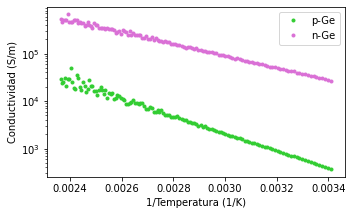

In [372]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
plt.plot(v_h_t['1/T (1/K)'], v_h_t['conductividad p'],'.', label='p-Ge',c='limegreen')
plt.plot(v_h_t['1/T (1/K)'], v_h_t['conductividad n'],'.', label='n-Ge',c='orchid')
plt.xlabel('1/Temperatura (1/K)')
plt.ylabel('Conductividad (S/m)')
plt.yscale('log')
plt.tight_layout()
plt.legend()
plt.tight_layout()
plt.savefig('conductividad_inv_temp.pdf')

In [328]:
y_p = np.log(v_h_t['conductividad p']/sigma_p)
y_n = np.log(v_h_t['conductividad n']/sigma_n)

In [329]:
popt_p, pcov_p = curve_fit(ajuste_lineal, v_h_t['1/T (1/K)'], y_p)
popt_n, pcov_n = curve_fit(ajuste_lineal, v_h_t['1/T (1/K)'], y_n)

In [363]:
#plt.plot(v_h_t['1/T (1/K)'], v_h_t['1/T (1/K)']*popt_p[0]+ popt_p[1])
#plt.plot(v_h_t['1/T (1/K)'], v_h_t['1/T (1/K)']*popt_n[0]+ popt_n[1])

In [345]:
print('La constante E_g es: {} \pm {}'.format(np.round(np.abs(popt_p[0]*8.617333262e-05*2),1), np.round(np.abs(pcov_p[0,0]*8.617333262e-05*2),1)))

La constante E_g es: 0.7 \pm 0.2


In [348]:
last = pd.read_excel('Efecto_Hall.xlsx', sheet_name='last')

In [351]:
last['T n (K)'] = last['T n'] + 273.15
last['T p (K)'] = last['T p'] + 273.15

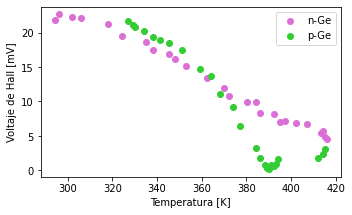

In [362]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
plt.scatter(last['T n (K)'], np.abs(last['VH n']), label='n-Ge',c='orchid')
plt.scatter(last['T p (K)'], np.abs(last['VH p']), label='p-Ge', c='limegreen')
plt.legend()
plt.xlabel('Temperatura [K]')
plt.ylabel('Voltaje de Hall [mV]')
plt.tight_layout()
plt.savefig('V_h_temp.pdf')

In [398]:
I_p = 30
w = 1e-3
B = 300
last['R_n'] = last['VH n']*w/(I_p*B)
last['R_p'] = last['VH p']*w/(I_p*B)

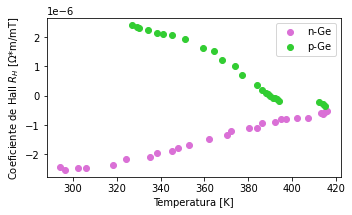

In [403]:
fig, ax = plt.subplots(figsize=(5,5/1.61616))
plt.scatter(last['T n (K)'], last['R_n'], label='n-Ge',c='orchid')
plt.scatter(last['T p (K)'], last['R_p'], label='p-Ge', c='limegreen')
plt.xlabel('Temperatura [K]')
plt.ylabel(r'Coeficiente de Hall $R_H$ [$\Omega$*m/mT]')
plt.legend()
plt.tight_layout()
plt.savefig('C_h_temp.pdf')

In [400]:
altas_temp_n = last[last['T n (K)'] > 390]
altas_temp_n, R_H_n = altas_temp_n['T n (K)'], altas_temp_n['R_n']
altas_temp_p = last[last['T p (K)'] > 390]
altas_temp_p, R_H_p = altas_temp_p['T p (K)'], altas_temp_p['R_p']

In [401]:
y = R_H_p*altas_temp_p**(3/2)
x = 1/altas_temp_p

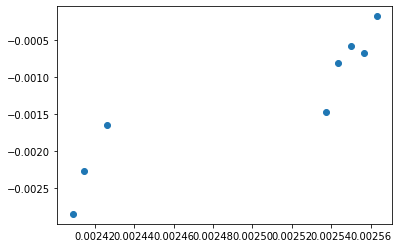

In [402]:
plt.scatter(x,y)

In [388]:
y

14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
dtype: float64